# Assignment 1 : Haberman's Survival Dataset EDA

### Description : 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### About the File (haberman.csv):

1. No. of Instances : 306
2. No. of Columns : 4 (including class Attributes)

### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute):
       1 = the patient survived 5 years or longer
       2 = the patient died within 5 year
    


### Some Basic Terminology in the dataset :

#### Positive axillary node :

A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread.

If a woman diagnosed with breast cancer has node-positive disease, it means that their cancer has spread from their original breast tumor to the underarm lymph nodes on the side of their breast cancer.

#### The more lymph nodes that contain cancer, the poorer prognosis tends to be 


## Let's get started with Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")



In [2]:

#Loading Haberman's Survival Dataset into pandas dataframe
haberman = pd.read_csv("haberman.csv")

#Counting the data-points and features in the dataset
print(haberman.shape)


(305, 4)


In [3]:
#Getting the column names in our database
print(haberman.columns)


Index(['30', '64', '1', '1.1'], dtype='object')


In [4]:
# The CSV file doesn't contain headers , so it returned values instead of column names
# Since we know the column names,  we can add it ourselves. [Age, Op_Year , axil_noes_det, Surv_status]
haberman = pd.read_csv("haberman.csv", names=["Age", "Op_Year" , "axil_nodes_det", "Surv_status"])
print(haberman.columns)


Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [5]:
#So now the column headers are added
#Let's see the high level statistics of the dataset
print(haberman.describe())

              Age     Op_Year  axil_nodes_det  Surv_status
count  306.000000  306.000000      306.000000   306.000000
mean    52.457516   62.852941        4.026144     1.264706
std     10.803452    3.249405        7.189654     0.441899
min     30.000000   58.000000        0.000000     1.000000
25%     44.000000   60.000000        0.000000     1.000000
50%     52.000000   63.000000        1.000000     1.000000
75%     60.750000   65.750000        4.000000     2.000000
max     83.000000   69.000000       52.000000     2.000000


### Observations :
    We can see that : 
    1. Mean and Median age of patients is 52 and the range of age is between 32 to 83.
    2. Mean positive axillary nodes detected for a patient is 4. We can also see that 25% of patients have no positive axillary node detected, 50% have 1 and 75% have only 4 positive axillary nodes detected.
    

In [6]:
# Count the Survial status, i.e (1) how many people survived 5 or more than 5 years after opertaion.
#(2) how many people survived less than 5 years after operation.
haberman["Surv_status"].value_counts()


1    225
2     81
Name: Surv_status, dtype: int64

### Observations:
    The above result shows that:
    1. 225 people survived 5 years or more than 5 years after operation.
    2. 81 people survived less tahn 5 years after operation.
    
#### It is an imbalanced dataset    

## 2D - Scatter plot

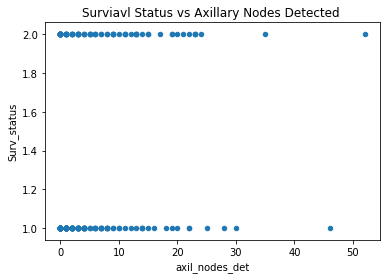

In [7]:
# checking relationship between no. of axillary nodes detected vs Survival status
haberman.plot(kind='scatter', y='Surv_status', x='axil_nodes_det');
plt.title("Surviavl Status vs Axillary Nodes Detected ")
plt.show()


### Observation:
#### Cannot conclude anything from these 2D scatter plot

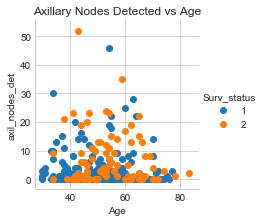

In [8]:
# For Age and Axillary nodes dectected
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue='Surv_status') \
    .map(plt.scatter, 'Age', 'axil_nodes_det') \
    .add_legend()
plt.title("Axillary Nodes Detected vs Age")
plt.show()

### Observation:
Cannot make much sense out of it

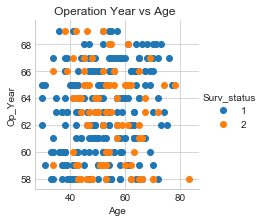

In [9]:
# For Age and Operation Year
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue='Surv_status') \
    .map(plt.scatter, 'Age', 'Op_Year') \
    .add_legend()
plt.title("Operation Year vs Age ")
plt.show()

### Observation:
Lot of overlapping data cannot make much sense out of it.

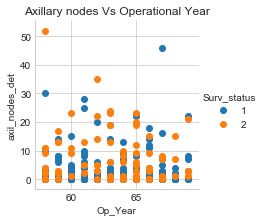

In [10]:
# For Operation year and Axillary nodes detected
sb.set_style('whitegrid')
sb.FacetGrid(haberman, hue='Surv_status') \
    .map(plt.scatter, 'Op_Year', 'axil_nodes_det') \
    .add_legend()
plt.title("Axillary nodes Vs Operational Year")
plt.show()

### Observation:
Same as above cannot make much conclusion from the data.

## Pair-Plot

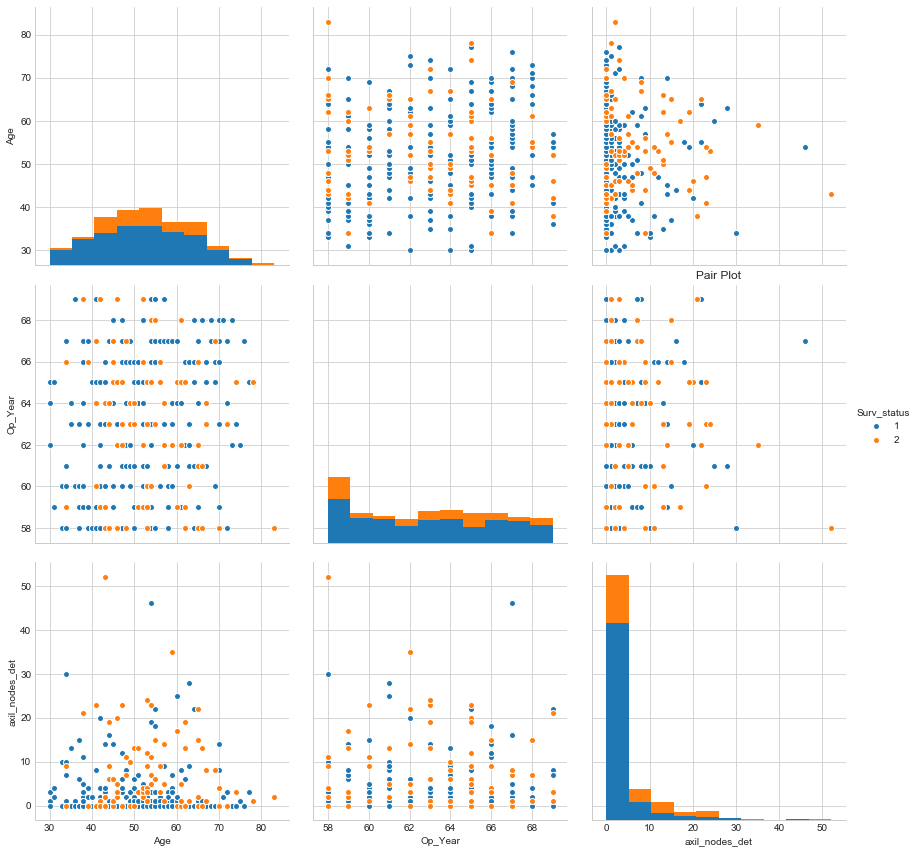

In [35]:
sb.set_style("whitegrid");
sb.pairplot(haberman,vars=["Age", "Op_Year","axil_nodes_det"], hue="Surv_status", size=4);
plt.title("Pair Plot")
plt.show()

### Observations : 
    Same as 2D scatter plots , lot of overlappings, cannot make much sense out of it. 
    

## PDF, CDF, Histogram : 

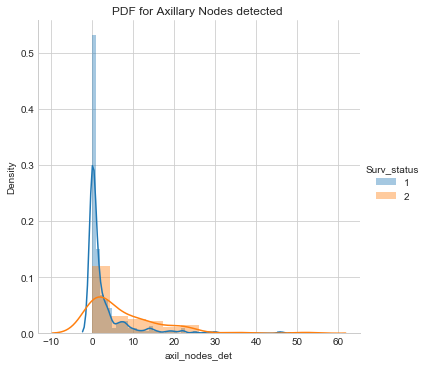

In [12]:
# PDF (probability Distribution Function)
sb.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sb.distplot, "axil_nodes_det") \
   .add_legend();
plt.title("PDF for Axillary Nodes detected ")
plt.ylabel("Density")
plt.show();


### Observations :
    We can observe that as the no. of axillary nodes increase the chance of suviving more than 5 years after operation decreases.

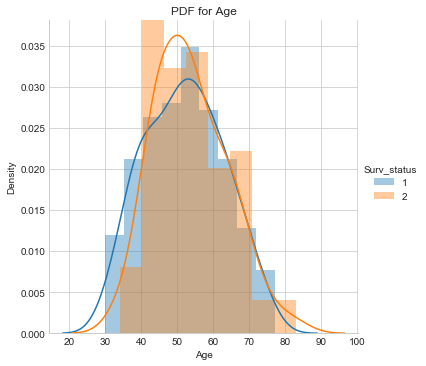

In [13]:
sb.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sb.distplot, "Age") \
   .add_legend();
plt.title("PDF for Age")
plt.ylabel("Density")
plt.show();

### Observations:
    1. We cannot say anything about patients from roughly age of 34 to 82 as lot of points are overlapping.
    2. Patients from age 30 to 34 have survived more than 5 years after operation.
    3. Patients rom age 78  to 82 have not survived more than 5 years after operation.

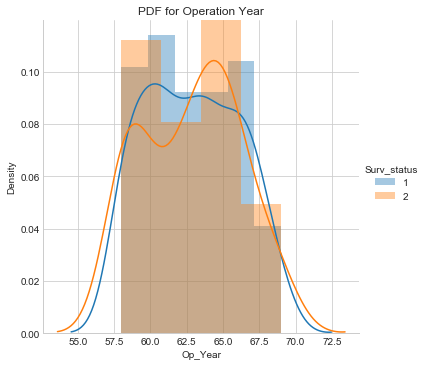

In [14]:
sb.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sb.distplot, "Op_Year") \
   .add_legend();
plt.title("PDF for Operation Year")
plt.ylabel("Density")
plt.show();

### Observation:
#### Lot of overlapping data cannot make much sense out of it.

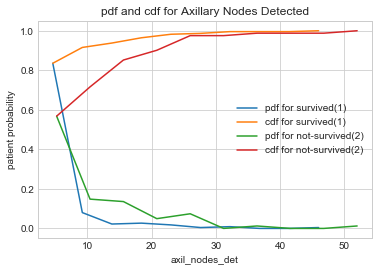

In [15]:
#  Cumulative Distribution Function (CDF) for Axillary Nodes Detected

haberman_one = haberman.loc[haberman["Surv_status"] == 1]
haberman_two = haberman.loc[haberman["Surv_status"] == 2]

labels= ["pdf for survived(1)","cdf for survived(1)","pdf for not-survived(2)","cdf for not-survived(2)"]
counts, bin_edges = np.histogram(haberman_one["axil_nodes_det"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_two["axil_nodes_det"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for Axillary Nodes Detected")
plt.xlabel("axil_nodes_det")
plt.ylabel("patient probability")
plt.legend(labels)

plt.show();

### Obseration:
Patients having approxiamtely more than 46 auxillary nodes detected have not survived more than 5 years after operation.

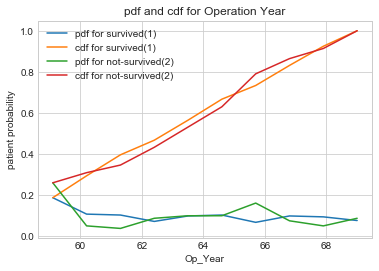

In [16]:
#Cumulative Distribution Function (CDF) for Operation Year

counts, bin_edges = np.histogram(haberman_one["Op_Year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_two["Op_Year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for Operation Year")
plt.xlabel("Op_Year")
plt.ylabel("patient probability")
plt.legend(labels)

plt.show();

### Observation: 
Patients that had operations in year 60-65 had better probability of surviving more than 5 years after operation. 

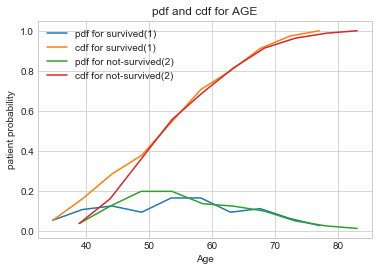

In [17]:
#Cumulative Distribution Function (CDF) for AGE

counts, bin_edges = np.histogram(haberman_one["Age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# haberman 2
counts, bin_edges = np.histogram(haberman_two["Age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for AGE")
plt.xlabel("Age")
plt.ylabel("patient probability")
plt.legend(labels)

plt.show();


### Observations:
1. Patients approximately below the age of 38 have a 15% probability of survival more than 5 years after operation. 
2. Patients above the age of 78 have nearly 0% chance of surviving more than 5 years after operation.

### Mean : 

In [18]:
print(np.mean(haberman_one))

Age               52.017778
Op_Year           62.862222
axil_nodes_det     2.791111
Surv_status        1.000000
dtype: float64


In [19]:
print(np.mean(haberman_two))

Age               53.679012
Op_Year           62.827160
axil_nodes_det     7.456790
Surv_status        2.000000
dtype: float64


### Observation:
1. Mean age of patients who survived more than 5 years after operation is 52 years and who didn't survive is 54 years.

2. Patients having more than 8 axillary nodes detected, have not survived more than 5 years after operation.

3. Patients having less than 3 axillary nodes detected, they have survived more than 5 years after the operation.

### Median : 

In [20]:
#Median, 
print("\nMedians for Axilary nodes detected:")
print("Median Axillary nodes detected for case 1 : ",np.median(haberman_one["axil_nodes_det"]))
print("Median Axillary nodes detected for case 2 : ",np.median(haberman_two["axil_nodes_det"]))

print("\nMedians for Age:")
print("Median Age for case 1 : ",np.median(haberman_one["Age"]))
print("Median Age for case 2 : ",np.median(haberman_two["Age"]))




Medians for Axilary nodes detected:
Median Axillary nodes detected for case 1 :  0.0
Median Axillary nodes detected for case 2 :  4.0

Medians for Age:
Median Age for case 1 :  52.0
Median Age for case 2 :  53.0


We know that mean can get corrupted with outlier data, but median cannot be corrupted. For a median to be corrupted , 50% or more data needs to be an outlier. So, median is also a good metric to analyse ou case. Median is also equivalent to mean.

### Observations: 
1. The median of axilary nodes detected for patients who survived 5 years after operation is 0.0, who didn't is 4.0.
2. No major difference in Median age of Patients.


In [21]:
print("\nQuantiles for Axillary nodes Detected:")
print("Axillary nodes detected Quantiles for case 1 : ",np.percentile(haberman_one["axil_nodes_det"],np.arange(0, 100, 25)))
print("Axillary nodes detected Quantiles for case 2 : ",np.percentile(haberman_two["axil_nodes_det"],np.arange(0, 100, 25)))

print("\nQuantiles Age:")
print("Age Quantiles for case 1 : ",np.percentile(haberman_one["Age"],np.arange(0, 100, 25)))
print("Age Quantiles for case 2 : ",np.percentile(haberman_two["Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles of Axillary nodes detected:")
print("90th Percentile of Axillary nodes detected for case 1 : ",np.percentile(haberman_one["axil_nodes_det"],90))
print("90th Percentile of Axillary nodes detected for case 2 : ",np.percentile(haberman_two["axil_nodes_det"],90))

print("\n90th Percentiles of Age:")
print("90th Percentile of Age for case 1 : ",np.percentile(haberman_one["Age"],90))
print("90th Percentile of Age for case 2 : ",np.percentile(haberman_two["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation for Axilary node Detected")
print( "case 1 : ",robust.mad(haberman_one["axil_nodes_det"]))
print( "case 2 : ",robust.mad(haberman_two["axil_nodes_det"]))

print ("\nMedian Absolute Deviation for Age")
print( "case 1 : ",robust.mad(haberman_one["Age"]))
print( "case 2 : ",robust.mad(haberman_two["Age"]))



Quantiles for Axillary nodes Detected:
Axillary nodes detected Quantiles for case 1 :  [0. 0. 0. 3.]
Axillary nodes detected Quantiles for case 2 :  [ 0.  1.  4. 11.]

Quantiles Age:
Age Quantiles for case 1 :  [30. 43. 52. 60.]
Age Quantiles for case 2 :  [34. 46. 53. 61.]

90th Percentiles of Axillary nodes detected:
90th Percentile of Axillary nodes detected for case 1 :  8.0
90th Percentile of Axillary nodes detected for case 2 :  20.0

90th Percentiles of Age:
90th Percentile of Age for case 1 :  67.0
90th Percentile of Age for case 2 :  67.0

Median Absolute Deviation for Axilary node Detected
case 1 :  0.0
case 2 :  5.930408874022408

Median Absolute Deviation for Age
case 1 :  13.343419966550417
case 2 :  11.860817748044816


### Observations:
1. 50% of patients who survived had 0 axillary nodes detected and 75% who survived had 3 axiallry nodes detected, 90th% had 8.
2. 50% of patients who didn't survive had 4 axillary nodes detected, 75% had 11 and  90th% had 20.
3. Median absolute deviation for axillary nodes of patients who survived is 0, that is patients who survived had almost same number of axillary nodes detected, not much of spread.
4. While Meadian absolute deviation of patients who didn't survive was 5.9, lot of spread as compared to survived.
5. we cannot say much from Median Absolute Deviation, Qunatiles,percentiles of age as they are almost same.

## Box Plots and Whiskers:

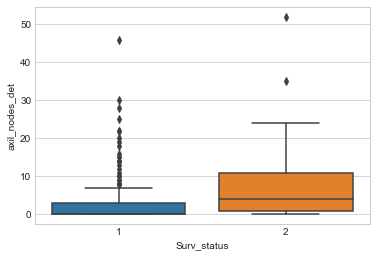

In [22]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.
#Box-plot can be visualized as a PDF on the side-ways.

sb.boxplot(x='Surv_status',y='axil_nodes_det', data=haberman)
plt.show()

### Observations:
1. For patients who survived the boxplot for axilary nodes detected showed thatthe 25th and 50th percentiles are overlapped and 75th percentile value is nearly 3.
2. Also we can see that there are many outliers of axillary nodes detected for people who survived.
3. For people who didn't survive 25th percentile of axillary nodes detected is 1 , 50th percentile is 4 and 75th percentile is 11.
4. There are very few outliers of axillary nodes detected for people who didn't survived.

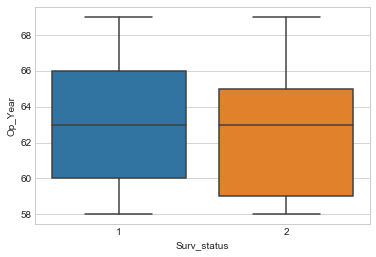

In [23]:
sb.boxplot(x='Surv_status',y='Op_Year', data=haberman)
plt.show()

### Obseravtions: 
1. As the year increased, percentile of patients surviving the opertaion also increased.
2. 75th percentile of Op_Year of people who survived is 1966, and 75th percentile of people wo didn't survive is 1965.
3. 25th percentile of Op_Year of people who survived is 1960, and 75th percentile of people wo didn't survive is 1959.

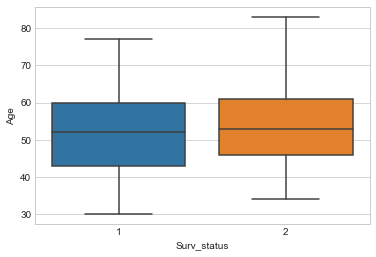

In [24]:
sb.boxplot(x='Surv_status',y='Age', data=haberman)
plt.show()

### Observations :
Nearly same boxplot of Age. Just the 25th percentile of patients who survived is around 42 and who didnot survive is 44.

## Violin Plots : 

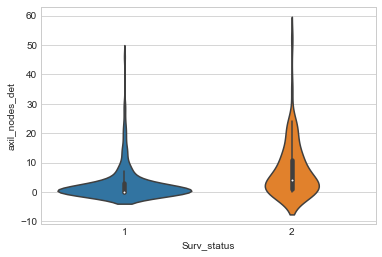

In [25]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sb.violinplot(x='Surv_status',y='axil_nodes_det', data=haberman, size=8)
plt.show()

### Observations : 
1. 50th percentile of survivors had 0 axillary nodes, 75th percentile of survivors had nearly 3 axillary nodes detected.
2. 25th percentile of who didn't survive had 1 axillary node, 50th percentile had axillary nodes detected below 4, 75th percentile had below 11.
3. The no. of people survived with 0 axillary nodes detected is almost double than the people who didn't survive with 1 axillary nodes detected.
4. The number of axillary nodes detected of the survivors is highly densed from 0 to 5.
5. Almost 80% of the patients have less than or equal to 5 axillary nodes detected.

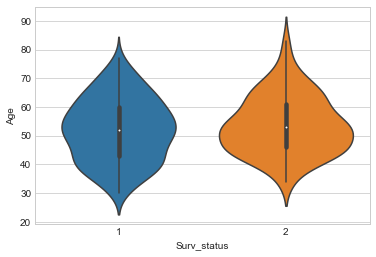

In [26]:
sb.violinplot(x='Surv_status',y='Age', data=haberman, size=8)
plt.show()

### Observations: 
Same as Box plot , overlapped , cannot say much from it.

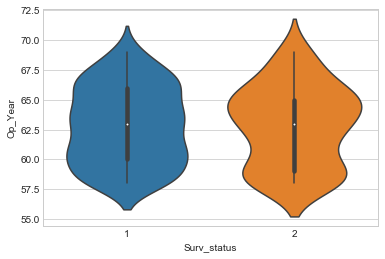

In [27]:
sb.violinplot(x='Surv_status',y='Op_Year', data=haberman, size=8)
plt.show()

### Observations:
1. From year 1960 to 1962 , spread of patients surviving the operation was greater than patients not surving.


## Contour Plots : 

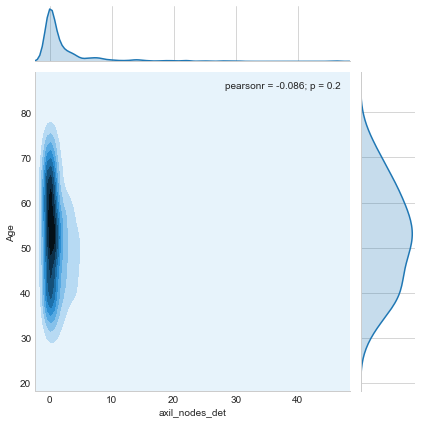

In [28]:
import seaborn as sns
sns.jointplot(x="axil_nodes_det", y="Age", data=haberman_one, kind="kde");
plt.show();


## Observations : 
1. Highest no. of patients who survived were having 0 Axillary nodes detected and were in the age range of 50 to 60.
2. We can see that most of patients who survived had 0 Axillary nodes detected and maximum average Axillary nodes detected for patients were nearly 8 ( excluding outliers). 

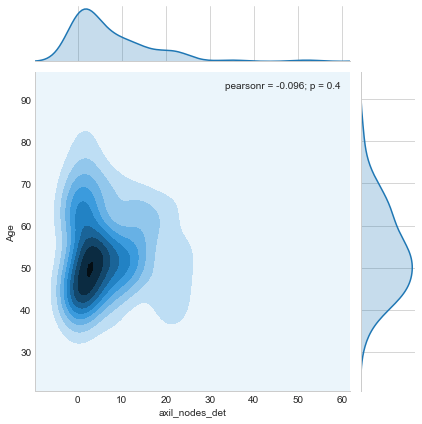

In [29]:
import seaborn as sns
sns.jointplot(x="axil_nodes_det", y="Age", data=haberman_two, kind="kde");
plt.show();

## Observations: 
1. Highest no. of patients who didn't survive were having nearly 3 Axillary nodes detected and were in the age range of 48 to 52 years.
2. It is not consistent as the contour plot of patirnts who survived, it is unevenly spread. The axillary nodes detected and age were in variety of ranges. 

## Conclusion:

1. The given dataset is imbalanced as each class doesnot have the equal no. of data points.
2. There is lot of overlapping of the data points, we can not classify / analyze data points using simple methologies.
3. Only Axillary nodes detected gives some intuition about the cases. If Axillary nodes detected is greater than 3, chances of surviving 5 years after operation is less, if it is less than 3 chances of survival is more.
4. As the no. of axillary nodes detected increase, chances of survival decrease.
5. Age and Operation Year had lot of overlappings, they are not useful for classifying the datapoints.


### References : 
1. Information about the dataset : 
https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

2. Positive Lymph nodes : 
https://ww5.komen.org/BreastCancer/LymphNodeStatusandStaging.html

3. Code Reference : 
https://www.appliedaicourse.com/
